In [55]:
import numpy as np
import pandas as pd

# Data historical return for PCAR, ALTO, IKAN
returns = {
    "PCAR": [0.15446,-0.01961,0.26541,0.44942,-0.12790,-0.06399,0.05296,0.09701,0.26531,1.25806,-0.04286,-0.04478,0.08203,0.03490,-0.30233,0.03333,0.28065,-0.05416,0.00533,-0.03444,0.05761,0.03243,-0.01005,-0.01015,-0.02564,-0.00263,-0.05145,-0.12239,0.08082,-0.02053,-0.02395],
    "ALTO": [0.17160,-0.04545,0.01587,0.01563,-0.06154,-0.03825,0.01136,-0.08989,-0.05556,-0.10458,0.55474,-0.01878,-0.15789,0.19886,0.04265,0.07727,-0.01266,-0.19231,0.03704,0.04592,0.06829,-0.00913,-0.05530,0.37805,0.60177,0.18232,0.11215,-0.09664,0.02326,0.09091,0.04583],
    "IKAN": [-0.21613,0.23971,0.03734,-0.02000,0.04898,0.00000,0.10117,0.06360,-0.05980,-0.00353,-0.04255,-0.02963,-0.00763,0.01154,-0.01521,-0.10039,0.12017,0.11494,-0.16495,-0.03292,0.02553,-0.03734,0.00862,-0.01709,0.02609,0.02966,0.02881,0.10400,0.34420,0.50943,-0.06964]
}
average = {
    "PCAR": 0.06704,
    "ALTO": 0.17326,
    "IKAN": 0.09076
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(returns)

# Step 1: Calculate mean return (expected return) for each stock
mean_returns = df.mean()

# Step 2: Calculate covariance matrix
cov_matrix = df.cov()

# Show the results
mean_returns, cov_matrix


(PCAR    0.070738
 ALTO    0.055985
 IKAN    0.032161
 dtype: float64,
           PCAR      ALTO      IKAN
 PCAR  0.068164 -0.009087 -0.002879
 ALTO -0.009087  0.032074 -0.003535
 IKAN -0.002879 -0.003535  0.018726)

In [56]:
from scipy.optimize import minimize


# Number of assets
n_assets = len(df.columns)

# Function to calculate portfolio standard deviation
def portfolio_std(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Constraint: sum of weights must be 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: between 0 and 1 (no short selling)
bounds = tuple((0, 1) for asset in range(n_assets))

# Initial guess (equal weights)
init_guess = [1/n_assets] * n_assets

# Minimize the portfolio standard deviation
opt_results = minimize(portfolio_std, init_guess, args=cov_matrix, method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for minimum standard deviation
opt_weights = opt_results.x

# Calculate the expected return and standard deviation for the minimum risk portfolio
min_std = portfolio_std(opt_weights, cov_matrix)
expected_return_min_risk = np.dot(opt_weights, mean_returns)

opt_weights, min_std, expected_return_min_risk


(array([0.17515033, 0.33613042, 0.48871925]),
 0.0863898763747806,
 0.04692558094031639)

In [57]:
cov_matrix_values = np.array([
    [0.065965597, -0.008793828, -0.002786382],
    [-0.008793828, 0.031039499, -0.003421115],
    [-0.002786382, -0.003421115, 0.018121749]
])

# Convert to DataFrame
cov_matrix_df = pd.DataFrame(cov_matrix_values)

# Convert DataFrame to Series
cov_matrix_series = cov_matrix_df.stack()


portfolio_std(np.array([0.1750,	0.3361,	0.4889]), cov_matrix_df)

0.08498513034892857

In [54]:
np.dot(np.array([1/3,	1/3,	1/3]), np.array([0.06704,	0.17326,	0.09076]))

0.11035333333333333

In [30]:
cov_matrix_df

,0,1,2
0,0.065966,-0.008794,-0.002786
1,-0.008794,0.031039,-0.003421
2,-0.002786,-0.003421,0.018122


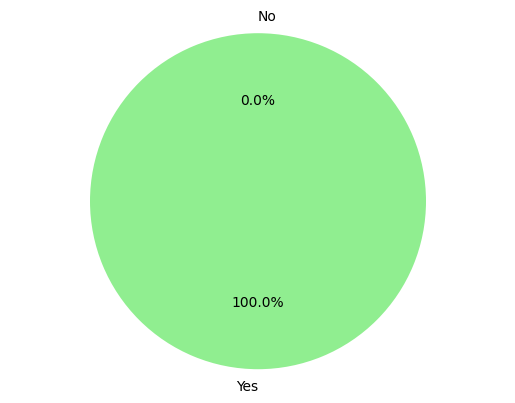

In [3]:
import matplotlib.pyplot as plt

# Data jawaban
jawaban = ['yes', 'yes', 'yes']

# Menghitung jumlah setiap jawaban
labels = ['Yes', 'No']
jumlah = [jawaban.count('yes'), jawaban.count('no')]

# Membuat diagram lingkaran
plt.pie(jumlah, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])

# Membuat tampilan lingkaran menjadi lebih simetris
plt.axis('equal')

# Menampilkan diagram lingkaran
# plt.title('Persentase Jawaban Yes/No')
plt.show()
